# Fourier Series approximation and Gibb's phenomenon


## by Aditya Mahajan and Calvin Ma



In [2]:
# Load packages for plotting
using Gadfly, Interact;
import PyPlot;

# Default plot sizes
# Plots.default(size=(600,300), leg=false);
Gadfly.set_default_plot_size(20cm, 8cm);

#  Colors used for plotting, based on Color Brewer 3class Set 1
blue = colorant"#377eb8"; 
red  = colorant"#e41a1c"; 

 in depwarn at ./deprecated.jl:73
while loading /home/adityam/.julia/v0.4/Interact/src/IJulia/statedict.jl, in expression starting on line 1


Consider the following periodic signals with fundamental period $T_0 = 1$.

In [3]:
T₀ = 1 ; 
ω₀ = 2π/T₀ ;

For ease of notation, we only give the definition of the sinal for $t \in [0,1]$.

$$ \text{squareWave}(t) = \begin{cases} 1 & \text{if $0 < t < 0.5$} \\ -1 & \text{if $0.5 < t < 1$} \end{cases}$$

and

$$ \text{sawtoothWave}(t) = t, \quad \text{for $0 < t < 1$} $$


In [4]:
 x_sq(t) = sign(sin(2π*t));
x_saw(t) = t - round(t, RoundDown);

In [5]:
time = linspace(-3,3,10000);

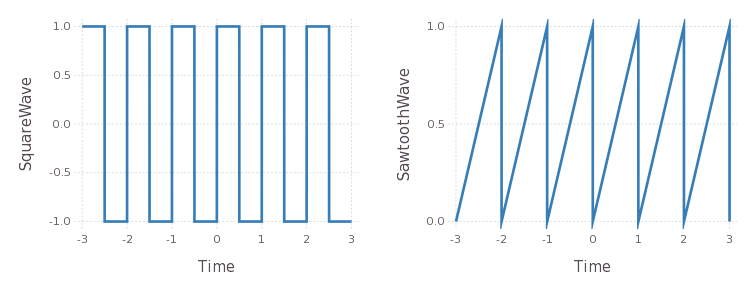

In [6]:
properties=(Guide.xlabel("Time"), Geom.line, Theme(line_width=2pt, default_color=blue)) ;
plt1 = plot(x=time, y= x_sq(time),   Guide.ylabel("SquareWave"), properties...); 
plt2 = plot(x=time, y=x_saw(time), Guide.ylabel("SawtoothWave"), properties...);

hstack(plt1, plt2)

In [7]:
# Helper function for stem plots
function stem(t, α)
    PyPlot.figure(figsize=(8,3)); PyPlot.ylim(0,1)
    plt = PyPlot.stem(t, [abs(α(k)) for k in t])
    PyPlot.setp(plt, color="#377eb8")
end

stem (generic function with 1 method)

The Fourier Series coefficients of the square wave are:

$$ \alpha^{sq}_k = \begin{cases} 0, & \text{if $k$ is even} \\ \displaystyle \frac{2}{j\pi k}, & \text{if $k$ is odd} \end{cases} $$



In [8]:
α_sq(k)  = mod(k,2) == 0? 0.0 : 2/(im*π*k) ;


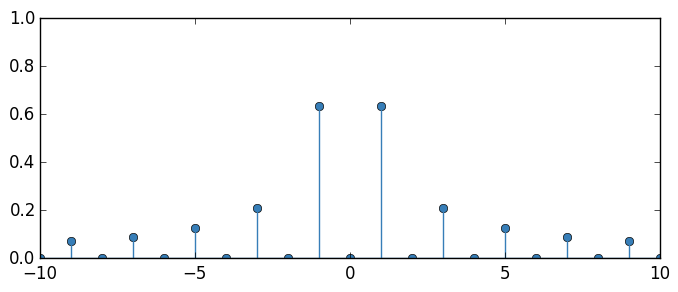

In [9]:
stem(-10:10, α_sq);

The Fourier Series coefficients of the sawtooth wave are:

$$ \alpha^{saw}_k = \begin{cases} \displaystyle \frac{1}{2}, & \text{if $k = 0$} \\ \displaystyle \frac{j}{2 \pi k}, & \text{if $k \neq 0$} \end{cases} $$


In [10]:
α_saw(k) = k == 0 ? 0.5 : im/(2*π*k);

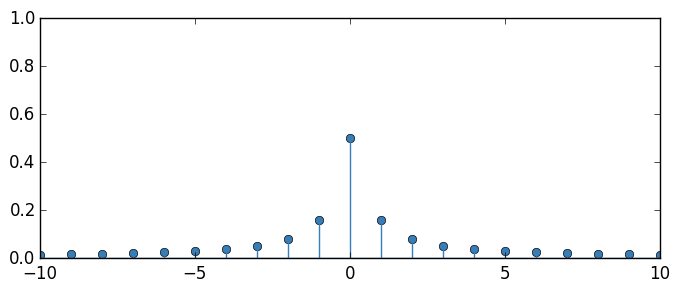

In [11]:
stem(-10:10, α_saw);

Let us consider partial sums

$$\hat x(t) = \sum_{k = -n}^n \alpha_k \exp(j \omega_0 k t) $$

In [12]:
function partialSum(α, n, t)
    sum = 0.0;
    for k = -n:n
        sum += α(k) * exp( im*ω₀*k*t )
    end
    return real(sum)
end;

In [13]:
 x̂_sq(n, t) = [partialSum(α_sq,  n, τ) for τ in t];
x̂_saw(n, t) = [partialSum(α_saw, n, τ) for τ in t];

In [14]:
nMax = 50;

Interact.Slider{Int64}([Reactive.Input{Int64}] 5,"n",5,1:50)

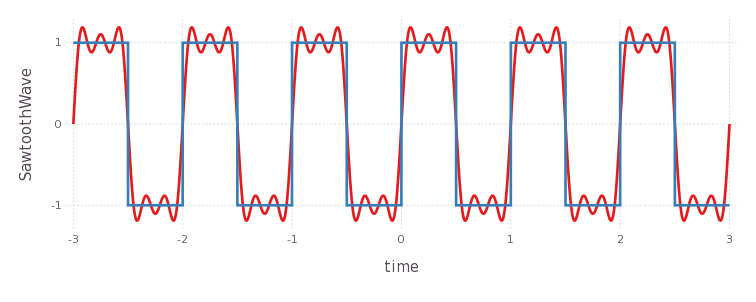

In [18]:
@manipulate for n in slider(1:nMax, value=5, label="n")
    plot(layer( x=time, y=x_sq(time),Geom.line, Theme(line_width=2pt, default_color=blue)),
    layer( x=time, y=x̂_sq(n,time), Geom.line, Theme(line_width=2pt, default_color=red)),
    Guide.xlabel("time"), Guide.ylabel("SawtoothWave"), 
    Coord.Cartesian(ymin=-1.2, ymax=1.2, xmin=-3, xmax=3))
    #Coord.Cartesian(ymin=-1.2, ymax=1.2, xmin=1, xmax=1.2))
end

Interact.Slider{Int64}([Reactive.Input{Int64}] 5,"n",5,1:50)

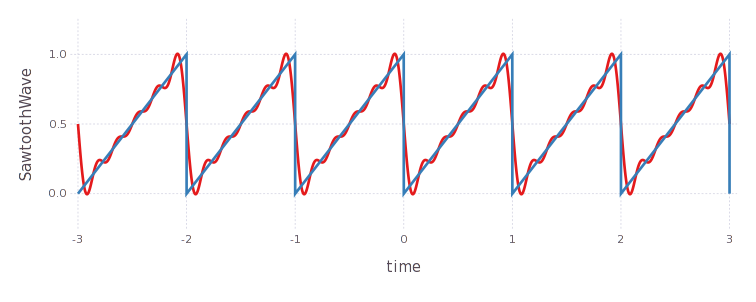

In [20]:
@manipulate for n in slider(1:nMax, value=5, label="n")
    plot(layer( x=time, y=x_saw(time), Geom.line, Theme(line_width=2pt, default_color=blue) ),
    layer( x=time, y=x̂_saw(n,time), Geom.line, Theme(line_width=2pt, default_color=red)),
    Guide.xlabel("time"), Guide.ylabel("SawtoothWave"), 
    Coord.Cartesian(ymin=-0.2, ymax=1.2, xmin=-3, xmax=3))
    #Coord.Cartesian(ymin=-1.2, ymax=1.2, xmin=1, xmax=1.2))
end